In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

from scipy import stats

from sklearn.datasets.samples_generator import make_blobs, make_circles
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.svm import SVC

from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d

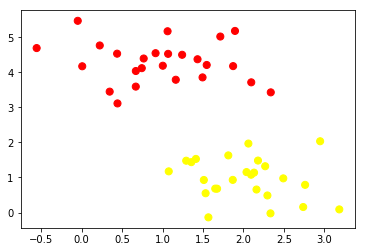

In [9]:
x, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

(-1, 3.5)

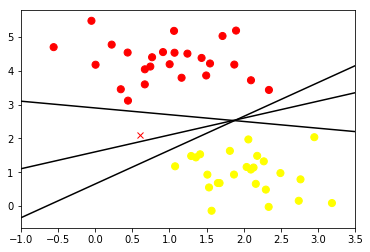

In [11]:
xfit = np.linspace(-1, 3.5)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red')

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
    
plt.xlim(-1, 3.5)

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    
plt.xlim(-1, 3.5)

In [20]:
svc_model = SVC()
svc_model = SVC(kernel = "linear", C=1E10)
svc_model.fit(x, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
# write a function to plot our svc decision function separator

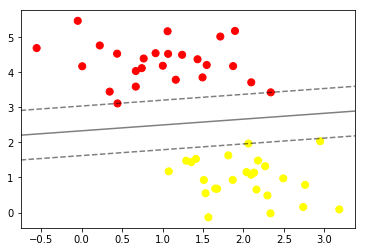

In [21]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(svc_model);

In [ ]:
# the martings pass the support vectors

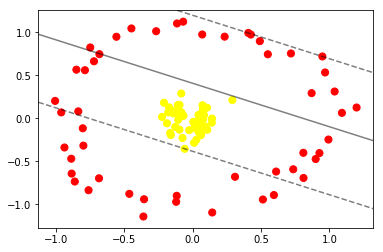

In [25]:
X, y = make_circles(100, factor=0.1, noise=0.1)

clf_svc_bad = SVC(kernel="linear")
clf_svc_bad.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")
plot_svc_decision_function(clf_svc_bad, plot_support=False)

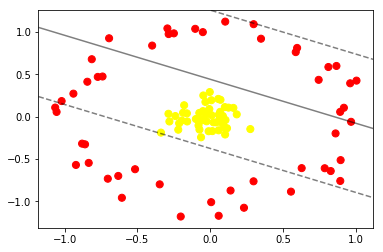

In [29]:
X, y = make_circles(100, factor=0.1, noise=0.1)

clf_svc_bad = SVC(kernel="linear")
clf_svc_bad.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")
plot_svc_decision_function(clf_svc_bad, plot_support=False)

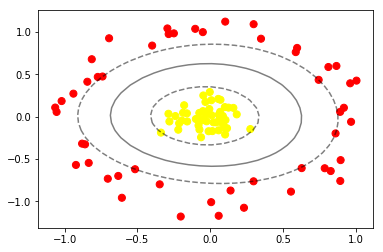

In [30]:
clf_svc_good = SVC(kernel="rbf", C=1E6)
clf_svc_good.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")

plot_svc_decision_function(clf_svc_good, plot_support=False)

In [32]:
r = np.exp(-(X ** 2).sum(1))

from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

In [34]:
data = load_iris()
print(data.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [35]:
def svc_iris_classifier(iris, kernel="linear", C=1.0, gamma="auto"):
    X, y = iris.data[:, :2], iris.target

    clf_svc_iris = SVC(kernel=kernel, C=C, gamma=gamma)
    clf_svc_iris.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    h = (x_max / x_min) / 100

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    plt.subplot(1, 1, 1)
    Z = clf_svc_iris.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.BuGn_r)
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.xlim(xx.min(), xx.max())
    plt.title("SVC (kernel='{}', C={}, gamma={})".format(kernel, C, gamma))

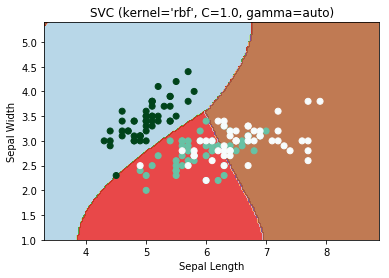

In [36]:
svc_iris_classifier(data, kernel="rbf")

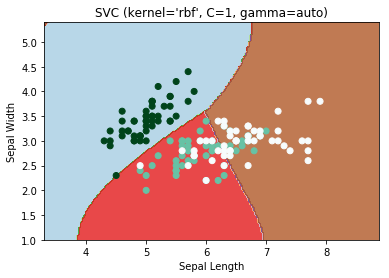

In [39]:
svc_iris_classifier(data, kernel="rbf", C=1)

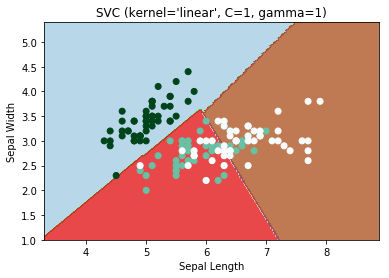

In [43]:
svc_iris_classifier(data, kernel="linear", C=1)

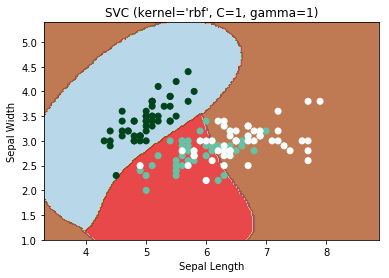

In [45]:
svc_iris_classifier(data, kernel="rbf", C=1, gamma=1)

In [46]:
X, y = data.data[:, :2], data.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

possible_kernels = ["linear", "rbf"]
possible_Cs = [1.0, 10.0, 100.0, 1000.0]
possible_gammas = ["auto", 0.1, 1.0, 10.0, 100.0]

def get_tuned_SVC_score(kernel, C, gamma):
    clf = SVC(kernel=kernel, C=C, gamma=gamma)
    clf.fit(X_train, y_train)
    return clf.score(X_test, y_test)

clf_scores = list()
for kernel in possible_kernels:
    for C in possible_Cs:
        for gamma in possible_gammas:
            clf_scores.append((get_tuned_SVC_score(kernel=kernel, C=C, gamma=gamma), kernel, C, gamma))
            
rel_max, position = 0, 0
for index, item in enumerate(clf_scores):
    if item[0] > rel_max:
        rel_max = item[0]
        position = index
        
print("\nBEST SVM CLASSIFIER SCORE WITH DETAILS IS: \n\n - Score: {}\n - Kernel: '{}'\n - C: {}\n - Gamma: {}\n".format(clf_scores[position][0], clf_scores[position][1], clf_scores[position][2], clf_scores[position][3]))


BEST SVM CLASSIFIER SCORE WITH DETAILS IS: 

 - Score: 0.868421052631579
 - Kernel: 'linear'
 - C: 1.0
 - Gamma: auto



In [ ]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html